In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel('preprocessed data.xlsx')

In [3]:
df.head()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
0,0,1,0,2,1,60,3,0,2.5,70,...,70,80,75,70,60,85,60,80,85,70
1,1,2,0,1,1,55,2,15,2.0,20,...,75,80,75,80,60,85,60,80,80,80
2,2,3,0,1,1,33,3,0,2.5,70,...,60,75,70,70,70,55,70,75,80,75
3,3,4,0,1,1,67,2,0,2.0,45,...,70,75,60,45,70,60,70,75,80,80
4,4,5,0,1,1,47,2,0,0.0,0,...,75,75,80,70,75,85,75,80,80,80


In [4]:
df.describe()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,116.500000,117.500000,0.183761,1.944444,0.705128,48.974359,2.598291,6.581197,1.737179,29.102564,...,73.846154,75.320513,71.559829,69.401709,70.170940,74.615385,70.170940,72.264957,76.303419,74.914530
std,67.694165,67.694165,0.388119,0.525234,0.670193,10.551294,0.533188,17.617168,0.849354,30.409335,...,6.804587,6.232602,7.427955,10.454528,8.957018,6.457316,8.957018,8.491241,5.851326,5.913646
min,0.000000,1.000000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,...,60.000000,55.000000,50.000000,40.000000,40.000000,55.000000,40.000000,50.000000,55.000000,55.000000
25%,58.250000,59.250000,0.000000,2.000000,0.000000,41.000000,2.000000,0.000000,1.500000,0.000000,...,70.000000,70.000000,70.000000,65.000000,65.000000,70.000000,65.000000,70.000000,71.250000,70.000000
50%,116.500000,117.500000,0.000000,2.000000,1.000000,49.000000,3.000000,0.000000,2.000000,20.000000,...,75.000000,75.000000,70.000000,70.000000,70.000000,75.000000,70.000000,70.000000,80.000000,75.000000
75%,174.750000,175.750000,0.000000,2.000000,1.000000,56.750000,3.000000,0.000000,2.000000,60.000000,...,80.000000,80.000000,75.000000,75.000000,78.750000,80.000000,78.750000,80.000000,80.000000,80.000000
max,233.000000,234.000000,1.000000,3.000000,3.000000,75.000000,3.000000,80.000000,3.000000,80.000000,...,90.000000,90.000000,90.000000,95.000000,85.000000,90.000000,85.000000,85.000000,90.000000,85.000000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_res = df.iloc[:,3:].values
y_res = df.iloc[:,2].values

In [7]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [8]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [9]:
X_res.shape

(382, 84)

In [10]:
y_res.shape

(382,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import Normalizer

In [13]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_res)
y = pca.transform(X_res)
df4 = pd.DataFrame(y,columns=['PC1','PC2'])

In [15]:
df4['target'] = y_res

In [16]:
df4.head()

,PC1,PC2,target
0,101.196220,-32.343536,0
1,-36.057721,-1.903653,0
2,18.549351,-26.840679,0
3,81.796267,-16.017613,0
4,17.733019,7.371154,0


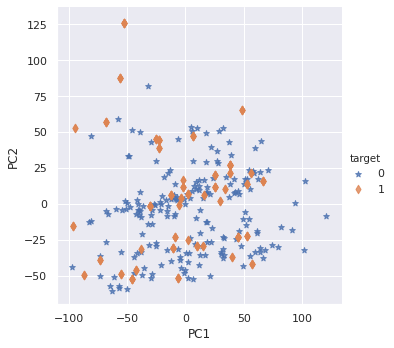

In [17]:
sns.set(color_codes=True)
sns.lmplot(data=df4, x='PC1', y='PC2', hue='target',
                   fit_reg=False, legend=True, legend_out=True,markers=['*',"d"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df4.drop('target',axis=1),df4.target, test_size=0.2, random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
model = GaussianNB()

In [21]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6493506493506493
[[32 15]
 [12 18]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        47
           1       0.55      0.60      0.57        30

    accuracy                           0.65        77
   macro avg       0.64      0.64      0.64        77
weighted avg       0.66      0.65      0.65        77



In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
model = SVC()

In [24]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5194805194805194
[[17 30]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.71      0.36      0.48        47
           1       0.43      0.77      0.55        30

    accuracy                           0.52        77
   macro avg       0.57      0.56      0.52        77
weighted avg       0.60      0.52      0.51        77



In [25]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
model = neighbors.KNeighborsClassifier(3)

In [27]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7922077922077922
[[31 16]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        47
           1       0.65      1.00      0.79        30

    accuracy                           0.79        77
   macro avg       0.83      0.83      0.79        77
weighted avg       0.86      0.79      0.79        77



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5194805194805194
[[20 27]
 [10 20]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        47
           1       0.43      0.67      0.52        30

    accuracy                           0.52        77
   macro avg       0.55      0.55      0.52        77
weighted avg       0.57      0.52      0.52        77



In [31]:
model = RandomForestClassifier()

<IPython.core.display.Javascript object>

In [32]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8701298701298701
[[37 10]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        47
           1       0.75      1.00      0.86        30

    accuracy                           0.87        77
   macro avg       0.88      0.89      0.87        77
weighted avg       0.90      0.87      0.87        77



In [33]:
import xgboost as xgb

In [34]:
model = xgb.XGBClassifier(objective='binary:logistic')

In [35]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8571428571428571
[[36 11]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        47
           1       0.73      1.00      0.85        30

    accuracy                           0.86        77
   macro avg       0.87      0.88      0.86        77
weighted avg       0.90      0.86      0.86        77

